<a href="https://colab.research.google.com/github/herrerocjuancarlos/PySpark/blob/main/PLN/Rese%C3%B1as%20Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Google Drive Access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opendatasets
!pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=96a2da299a472ac9e1d463b4eefe309071d1b99d1e0ffb81591e7599be1e10cf
  Stored in directory: /root/.cache/pip/wheels/32/6a/b6/b7eb43a6ad55b139c15c5daa29f3707659cfa6944d3c696f5b
Successfully built langid


In [ ]:
import opendatasets as od
import os
import pandas as pd
from langid import classify

In [ ]:
dataset_link="https://www.kaggle.com/datasets/bittlingmayer/amazonreviews"
od.download(dataset_link)


In [ ]:
os.chdir("/content/amazonreviews")
os.listdir()

['test.ft.txt.bz2', 'train.ft.txt.bz2']

In [ ]:
df = "train.ft.txt.bz2"
pd.read_table(df)
test = "test.ft.txt.bz2"
pd.read_table(test)

,"__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,__label__2 One of the best game music soundtra...
1,__label__1 Batteries died within a year ...: I...
2,"__label__2 works fine, but Maha Energy is bett..."
3,__label__2 Great for the non-audiophile: Revie...
4,__label__1 DVD Player crapped out after one ye...
...,...
399994,__label__1 Unbelievable- In a Bad Way: We boug...
399995,"__label__1 Almost Great, Until it Broke...: My..."
399996,__label__1 Disappointed !!!: I bought this toy...
399997,__label__2 Classic Jessica Mitford: This is a ...


In [ ]:

import pandas as pd

# Función para procesar el dataset
def process_dataset(file_path):
    df = pd.read_table(file_path, compression="bz2", header=None, names=["raw_text"])
    df[['label', 'text']] = df['raw_text'].str.extract(r"(__label__\d)\s(.+)", expand=True)
    df['label'] = df['label'].replace({"__label__1": 1, "__label__2": 2}).astype(int)
    df.drop(columns=["raw_text"], inplace=True)
    return df

# Cargar los datasets completos
df_train = process_dataset("train.ft.txt.bz2")
df_test = process_dataset("test.ft.txt.bz2")

# Tomar muestras aleatorias con semilla para reproducibilidad
train_sample = df_train.sample(n=3500000, random_state=42)
test_sample = df_test.sample(n=400000, random_state=42)

# Guardar las muestras en CSV (opcional)
train_sample.to_csv("sampled_train_reviews.csv", index=False, encoding="utf-8")
test_sample.to_csv("sampled_test_reviews.csv", index=False, encoding="utf-8")

# Mostrar información de las muestras
print("Train sample size:", len(train_sample))
print("Test sample size:", len(test_sample))

# Mostrar algunas filas para verificar
print("\nSampled Train Dataset:")
print(train_sample.head())

print("\nSampled Test Dataset:")
print(test_sample.head())

FileNotFoundError: [Errno 2] No such file or directory: 'train.ft.txt.bz2'

In [ ]:
len(train_sample)

3500000

In [ ]:
len(test_sample)

400000

In [ ]:
train_sample.head()

,label,text
2079998,1,Expensive Junk: This product consists of a pie...
1443106,1,"Toast too dark: Even on the lowest setting, th..."
3463669,2,Excellent imagery...dumbed down story: I enjoy...
2914699,1,Are we pretending everyone is married?: The au...
1603231,1,Not worth your time: Might as well just use a ...


In [ ]:
from langid import classify

def detect_language(text):
    return classify(text)[0]  # Devuelve solo el código del idioma


spanish_train_sample = train_sample[train_sample["text"].apply(detect_language) == "es"]

In [ ]:
len(spanish_train_sample)

6346

In [ ]:


# Existing code (no changes needed)
# ... (Your existing code to process the datasets and create spanish_train_sample) ...

# Save the DataFrame to a CSV file in your Google Drive
spanish_train_sample.to_csv("/content/drive/MyDrive/spanish_train_sample.csv", index=False, encoding="utf-8")

# Download the CSV file to your local machine
files.download("/content/drive/MyDrive/spanish_train_sample.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Con el dataframe ya importado en drive ahora es solo cargarlo y este dataframe ya esta limpio, solo tiene datos en español

In [ ]:

from google.colab import drive, files
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the Spanish train sample from your Google Drive
spanish_train_sample = pd.read_csv("/content/drive/MyDrive/spanish_train_sample.csv", encoding="utf-8")
spanish_test_sample = pd.read_csv("/content/drive/MyDrive/spanish_test_sample.csv", encoding="utf-8")

# Now you can work with the spanish_train_sample DataFrame
print("Spanish Train Sample shape:", spanish_train_sample.shape)
print(spanish_train_sample.head())
print("Spanish test Sample shape:", spanish_test_sample.shape)
print(spanish_test_sample.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Spanish Train Sample shape: (6346, 2)
   label                                               text
0      2  Excelente Compilación de lo mejor de Caifanes:...
1      2  Excelente Reloj: Excelente reloj, tiene numero...
2      1  Este libro es la guía de teléfonos: Con todas ...
3      2  Maravillosa historia: Cautivante fuera de este...
4      1  Fatal: Lastima que la linea de la pelicula no ...
Spanish test Sample shape: (772, 2)
   label                                               text
0      2  saludos: La camisa es 100% original y demaciad...
1      2  Reconocimiento: Después de conocer las bondade...
2      2  Lo mejor !!!!!!: Es una Historia muy buena, au...
3      2  Tan buena como la recordaba.: Si no compraste ...
4      2  Complemento: Estos libros sin duda que sirven ...


In [ ]:
len(spanish_train_sample)

6346

In [ ]:
len(spanish_test_sample)

772

In [ ]:
spanish_train_sample.head()

,label,text
0,2,Excelente Compilación de lo mejor de Caifanes:...
1,2,"Excelente Reloj: Excelente reloj, tiene numero..."
2,1,Este libro es la guía de teléfonos: Con todas ...
3,2,Maravillosa historia: Cautivante fuera de este...
4,1,Fatal: Lastima que la linea de la pelicula no ...


In [ ]:
spanish_test_sample.head()

,label,text
0,2,saludos: La camisa es 100% original y demaciad...
1,2,Reconocimiento: Después de conocer las bondade...
2,2,"Lo mejor !!!!!!: Es una Historia muy buena, au..."
3,2,Tan buena como la recordaba.: Si no compraste ...
4,2,Complemento: Estos libros sin duda que sirven ...


In [ ]:
spanish_train_sample.describe()

,label
count,6346.000000
mean,1.674283
std,0.468679
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [ ]:
spanish_test_sample.describe()

,label
count,772.000000
mean,1.661917
std,0.473364
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


# 📌 Step 1: Install necessary libraries

In [ ]:
# 📌 Step 1: Install necessary libraries
!pip install --upgrade fsspec==2024.9.0
!pip install scikit-learn nltk spacy pandas matplotlib datasets==3.1.0
!python -m spacy download es_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 req

# 📌 Step 2: Load a Real Spanish Sentiment Dataset

In [ ]:

df = spanish_train_sample.copy()
df_test= spanish_test_sample.copy()


# 📌 Step 3: Text Cleaning and Preprocessing

In [ ]:
# 📌 Step 3: Text Cleaning and Preprocessing
import spacy

nlp = spacy.load("es_core_news_sm")  # Spanish NLP model

def preprocess_text(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

df['clean_text'] = df['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)
print(df.head())
print(df_test.head())

   label                                               text  \
0      2  Excelente Compilación de lo mejor de Caifanes:...   
1      2  Excelente Reloj: Excelente reloj, tiene numero...   
2      1  Este libro es la guía de teléfonos: Con todas ...   
3      2  Maravillosa historia: Cautivante fuera de este...   
4      1  Fatal: Lastima que la linea de la pelicula no ...   

                                          clean_text  
0  excelente compilación caifán comentario disco ...  
1  excelente reloj excelente reloj numero claro f...  
2  libro guía teléfono estrella dado lector truch...  
3  maravilloso historia cautivante mundo aventura...  
4  fatal lastima linea pelicula seguir linea libr...  
   label                                               text  \
0      2  saludos: La camisa es 100% original y demaciad...   
1      2  Reconocimiento: Después de conocer las bondade...   
2      2  Lo mejor !!!!!!: Es una Historia muy buena, au...   
3      2  Tan buena como la recordaba.:

# 📌 Step 4: Feature extraction (Convert Text to TF-IDF Features)

In [ ]:
# 📌 Step 4: Convert Text to TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

# 🔹 Ajustar solo con los datos de train, transformar ambos**
X_train = vectorizer.fit_transform(df['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])

y_train = df['label']
y_test = df_test['label']

print(X_train.shape)
print(X_train[:, :100].toarray())
print(y_train)



(6346, 5000)
[[0.         0.         0.         ... 0.         0.         0.11977284]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0       2
1       2
2       1
3       2
4       1
       ..
6341    1
6342    2
6343    2
6344    1
6345    2
Name: label, Length: 6346, dtype: int64


# Step 5: Features selection by avg_tfidf score

In [ ]:
# Features selection by avg_tfidf score
import numpy as np

NTopFeatures = 100

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate average TF-IDF scores for each feature across all documents
avg_tfidf_scores = X_train.mean(axis=0).A1  # A1 converts matrix to 1D array

# Sort features by average TF-IDF scores in descending order
top_features_indices = np.argsort(avg_tfidf_scores)[::-1][:NTopFeatures]

# Get the top feature names
top_features = [feature_names[i] for i in top_features_indices]

print(f"Top {NTopFeatures} most significant features:")
for feature in top_features:
    print(feature)

# 🔹 Filtrar ambas matrices de características según las top features
top_features_indices = [np.where(vectorizer.get_feature_names_out() == feature)[0][0] for feature in top_features]

X_train_filtered = X_train[:, top_features_indices]
X_test_filtered = X_test[:, top_features_indices]

print("Shape of filtered X_train:", X_train_filtered.shape)
print(X_train_filtered[:, :100].toarray())

Top 100 most significant features:
libro
excelente
disco
él
producto
recomeir
cd
canción
calidad
gustar
comprar
the
tiempo
leer
historia
ver
tema
musico
mejor
escuchar
vida
compra
esperar
album
dvd
pelicula
sonido
querer
año
español
malo
llegar
novela
precio
realmente
dejar
pena
persona
grupo
voz
valer
original
perfecto
obra
amor
poder
tener
llego
funcionar
is
trabajo
pasar
encantar
of
encontrar
mundo
dinero
música
and
pensar
this
cosa
to
rock
haber
película
quedar
venir
problema
it
dar
banda
gracia
good
compre
completo
versión
seguir
salir
interesante
autor
juego
in
momento
forma
concierto
estilo
super
recomendable
video
cantar
sentir
letra
imagen
buscar
duda
exito
serie
perder
parecer
Shape of filtered X_train: (6346, 100)
[[0.         0.05703469 0.2997664  ... 0.         0.         0.        ]
 [0.         0.23546192 0.         ... 0.         0.         0.        ]
 [0.21098585 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.12543514 0.         0.         ... 0.

In [ ]:
# Let's filter the dataset X by the 10top features
# Get the indices of the top features in the vocabulary
#top_features_indices = [np.where(vectorizer.get_feature_names_out() == feature)[0][0] for feature in top_features]

# Filter the X matrix to keep only the columns corresponding to the top features
#X_filtered = X[:, top_features_indices]

# Print the shape of the filtered matrix
#print("Shape of filtered X:", X_filtered.shape)
#print(X_filtered[:, :100].toarray())


In [ ]:
def featureSelection(X, NTopFeatures):
  # Get feature names (words)
  feature_names = vectorizer.get_feature_names_out()

  # Calculate average TF-IDF scores for each feature across all documents
  avg_tfidf_scores = X.mean(axis=0).A1  # A1 converts matrix to 1D array

  # Sort features by average TF-IDF scores in descending order, ORDEN DESCENDENTE
  top_features_indices = np.argsort(avg_tfidf_scores)[::-1][:NTopFeatures]

  # Get the top NTopFeatures  feature names
  top_features = [feature_names[i] for i in top_features_indices]

  # Print the top NTopFeatures  features
  top_features_indices = np.argsort(avg_tfidf_scores)[::-1][:NTopFeatures]

  # Get the top NTopFeatures  feature names
  top_features = [feature_names[i] for i in top_features_indices]

  top_features_indices = [np.where(vectorizer.get_feature_names_out() == feature)[0][0] for feature in top_features]

  # Filter the X matrix to keep only the columns corresponding to the top features
  X_filtered = X[:, top_features_indices]

  return X_filtered

# Step6: Statistics of the dataset again (No included the feature selected)

In [ ]:
# Filter Spanish tweets only
# Map labels to human-readable format
label_mapping = {1: "negative", 2: "positive"}
df['label'] = df['label'].map(label_mapping)
df_test['label'] = df_test['label'].map(label_mapping)

print(df.head(), df['label'].value_counts())
print(df_test.head(), df_test['label'].value_counts())



      label                                               text  \
0  positive  Excelente Compilación de lo mejor de Caifanes:...   
1  positive  Excelente Reloj: Excelente reloj, tiene numero...   
2  negative  Este libro es la guía de teléfonos: Con todas ...   
3  positive  Maravillosa historia: Cautivante fuera de este...   
4  negative  Fatal: Lastima que la linea de la pelicula no ...   

                                          clean_text  
0  excelente compilación caifán comentario disco ...  
1  excelente reloj excelente reloj numero claro f...  
2  libro guía teléfono estrella dado lector truch...  
3  maravilloso historia cautivante mundo aventura...  
4  fatal lastima linea pelicula seguir linea libr...   label
positive    4279
negative    2067
Name: count, dtype: int64
      label                                               text  \
0  positive  saludos: La camisa es 100% original y demaciad...   
1  positive  Reconocimiento: Después de conocer las bondade...   
2  positi

In [ ]:


# Calculate and print the proportion of positive and negative samples in both datasets.
print("Train Dataset:")
print(df['label'].value_counts(normalize=True))
print("\nTest Dataset:")
print(df_test['label'].value_counts(normalize=True))


Train Dataset:
label
positive    0.674283
negative    0.325717
Name: proportion, dtype: float64

Test Dataset:
label
positive    0.661917
negative    0.338083
Name: proportion, dtype: float64


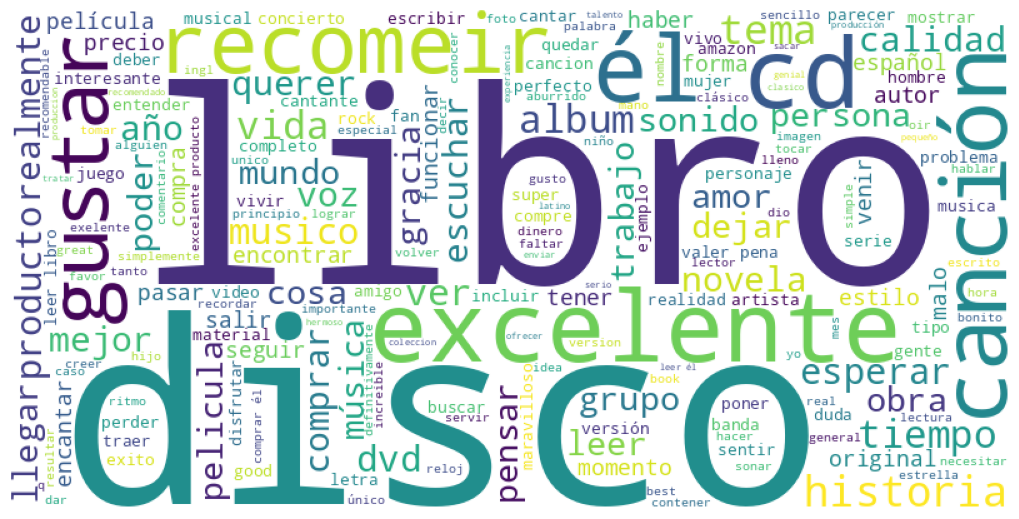

In [ ]:
# prompt: haz un grafico de nubes para el npl

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all preprocessed texts into a single string
text = " ".join(df['clean_text'].astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# 📌 Step 7: Train and Evaluate ML Models

In [ ]:
# 📌 Step 7: Train and Evaluate ML Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test) #predicciones, valores estimados del test

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # con 100 estimadores , compara los resultados de todos los arboles
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
X_train

<6346x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 116667 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

,label
0,2
1,2
2,2
3,2
4,2
...,...
767,1
768,2
769,1
770,2


In [ ]:
y_train

,label
0,2
1,2
2,1
3,2
4,1
...,...
6341,1
6342,2
6343,2
6344,1


In [ ]:
X_test

<772x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 13808 stored elements in Compressed Sparse Row format>

# 📌 Step 8: Print Evaluation Metrics

In [ ]:
# 📌 Step 8: Print Evaluation Metrics
print("🔹 Naïve Bayes Results:\n", classification_report(y_test, y_pred_nb))
print("🔹 SVM Results:\n", classification_report(y_test, y_pred_svm))
print("🔹 Random Forest Results:\n", classification_report(y_test, y_pred_rf))

🔹 Naïve Bayes Results:
               precision    recall  f1-score   support

           1       0.91      0.45      0.60       261
           2       0.78      0.98      0.87       511

    accuracy                           0.80       772
   macro avg       0.84      0.71      0.73       772
weighted avg       0.82      0.80      0.78       772

🔹 SVM Results:
               precision    recall  f1-score   support

           1       0.81      0.68      0.74       261
           2       0.85      0.92      0.88       511

    accuracy                           0.84       772
   macro avg       0.83      0.80      0.81       772
weighted avg       0.83      0.84      0.83       772

🔹 Random Forest Results:
               precision    recall  f1-score   support

           1       0.78      0.62      0.69       261
           2       0.82      0.91      0.87       511

    accuracy                           0.81       772
   macro avg       0.80      0.76      0.78       772
weighted

In [ ]:

import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# ... (Your existing code for data loading and preprocessing) ...

def evaluate_models(X_train, X_test, y_train, y_test):
    # Train Naïve Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)

    # Train SVM
    svm_model = SVC(kernel='linear', probability=True)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)

    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    print("🔹 Naïve Bayes Results:\n", classification_report(y_test, y_pred_nb))
    print("🔹 SVM Results:\n", classification_report(y_test, y_pred_svm))
    print("🔹 Random Forest Results:\n", classification_report(y_test, y_pred_rf))


# Original TF-IDF features
evaluate_models(X_train, X_test, y_train, y_test)


# Iterate through different numbers of top features
for n_top_features in [1000, 2000, 5000, 9000]:
    print(f"\nEvaluating models with top {n_top_features} features:")

    # Feature Selection
    X_train_filtered = featureSelection(X_train, n_top_features)
    X_test_filtered = featureSelection(X_test, n_top_features)


    # Evaluate models
    evaluate_models(X_train_filtered, X_test_filtered, y_train, y_test)


🔹 Naïve Bayes Results:
               precision    recall  f1-score   support

           1       0.91      0.45      0.60       261
           2       0.78      0.98      0.87       511

    accuracy                           0.80       772
   macro avg       0.84      0.71      0.73       772
weighted avg       0.82      0.80      0.78       772

🔹 SVM Results:
               precision    recall  f1-score   support

           1       0.81      0.68      0.74       261
           2       0.85      0.92      0.88       511

    accuracy                           0.84       772
   macro avg       0.83      0.80      0.81       772
weighted avg       0.83      0.84      0.83       772

🔹 Random Forest Results:
               precision    recall  f1-score   support

           1       0.78      0.62      0.69       261
           2       0.82      0.91      0.87       511

    accuracy                           0.81       772
   macro avg       0.80      0.76      0.78       772
weighted

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Original Naive Bayes model (for comparison)
nb_original = MultinomialNB()
nb_original.fit(X_train, y_train)
y_pred_original = nb_original.predict(X_test)
print("Original Naive Bayes Results:\n", classification_report(y_test, y_pred_original))

alphas = [0.1, 1, 2, 3,10]
fit_priors = [True, False]

for alpha in alphas:
    for fit_prior in fit_priors:
        # Note: class_prior is not a parameter in MultinomialNB
        nb_model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
        nb_model.fit(X_train, y_train)
        y_pred = nb_model.predict(X_test)
        print(f"\nNaive Bayes with alpha={alpha}, fit_prior={fit_prior}")
        print(classification_report(y_test, y_pred))


Original Naive Bayes Results:
               precision    recall  f1-score   support

           1       0.91      0.45      0.60       261
           2       0.78      0.98      0.87       511

    accuracy                           0.80       772
   macro avg       0.84      0.71      0.73       772
weighted avg       0.82      0.80      0.78       772


Naive Bayes with alpha=0.1, fit_prior=True
              precision    recall  f1-score   support

           1       0.86      0.59      0.70       261
           2       0.82      0.95      0.88       511

    accuracy                           0.83       772
   macro avg       0.84      0.77      0.79       772
weighted avg       0.83      0.83      0.82       772


Naive Bayes with alpha=0.1, fit_prior=False
              precision    recall  f1-score   support

           1       0.75      0.80      0.77       261
           2       0.89      0.86      0.88       511

    accuracy                           0.84       772
   macro

In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.1, 1, 10]
gammas = ['scale', 'auto', 0.1, 1]

for kernel in kernels:
    for C in Cs:
        for gamma in gammas:
            print(f"\nSVM with kernel='{kernel}', C={C}, gamma='{gamma}'")
            svm_model = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            svm_model.fit(X_train, y_train)
            y_pred_svm = svm_model.predict(X_test)
            print(classification_report(y_test, y_pred_svm))



SVM with kernel='linear', C=0.1, gamma='scale'
              precision    recall  f1-score   support

           1       0.98      0.18      0.31       261
           2       0.71      1.00      0.83       511

    accuracy                           0.72       772
   macro avg       0.84      0.59      0.57       772
weighted avg       0.80      0.72      0.65       772


SVM with kernel='linear', C=0.1, gamma='auto'
              precision    recall  f1-score   support

           1       0.98      0.18      0.31       261
           2       0.71      1.00      0.83       511

    accuracy                           0.72       772
   macro avg       0.84      0.59      0.57       772
weighted avg       0.80      0.72      0.65       772


SVM with kernel='linear', C=0.1, gamma='0.1'
              precision    recall  f1-score   support

           1       0.98      0.18      0.31       261
           2       0.71      1.00      0.83       511

    accuracy                           0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=0.1, gamma='auto'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=0.1, gamma='0.1'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=0.1, gamma='1'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=1, gamma='scale'
              precision    recall  f1-score   support

           1       0.93      0.05      0.10       261
           2       0.67      1.00      0.80       511

    accuracy                           0.68       772
   macro avg       0.80      0.53      0.45       772
weighted avg       0.76      0.68      0.57       772


SVM with kernel='poly', C=1, gamma='auto'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=1, gamma='0.1'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=1, gamma='1'
              precision    recall  f1-score   support

           1       0.93      0.05      0.10       261
           2       0.67      1.00      0.80       511

    accuracy                           0.68       772
   macro avg       0.80      0.53      0.45       772
weighted avg       0.76      0.68      0.57       772


SVM with kernel='poly', C=10, gamma='scale'
              precision    recall  f1-score   support

           1       0.97      0.11      0.19       261
           2       0.69      1.00      0.81       511

    accuracy                           0.70       772
   macro avg       0.83      0.55      0.50

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=10, gamma='0.1'


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.33      0.50      0.40       772
weighted avg       0.44      0.66      0.53       772


SVM with kernel='poly', C=10, gamma='1'
              precision    recall  f1-score   support

           1       0.97      0.11      0.19       261
           2       0.69      1.00      0.81       511

    accuracy                           0.70       772
   macro avg       0.83      0.55      0.50       772
weighted avg       0.78      0.70      0.60       772


SVM with kernel='rbf', C=0.1, gamma='scale'
              precision    recall  f1-score   support

           1       1.00      0.00      0.01       261
           2       0.66      1.00      0.80       511

    accuracy                           0.66       772
   macro avg       0.83      0.50      0.4

KeyboardInterrupt: 

In [ ]:
#El codigo de arriba tarda demasiado por tanto nos quedaremos con los mejores: da resultados muy desfavorables, c=0.1 tambien, gamma 0,1tambn descartamos el auto ya que tenemos buenas soluciones con el resto
kernels = ['linear', 'rbf', 'sigmoid']
Cs = [1, 10]
gammas = ['scale', 0.1, 1]

for kernel in kernels:
    for C in Cs:
        for gamma in gammas:
            print(f"\nSVM with kernel='{kernel}', C={C}, gamma='{gamma}'")
            svm_model = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
            svm_model.fit(X_train, y_train)
            y_pred_svm = svm_model.predict(X_test)
            print(classification_report(y_test, y_pred_svm))


SVM with kernel='linear', C=1, gamma='scale'
              precision    recall  f1-score   support

           1       0.81      0.68      0.74       261
           2       0.85      0.92      0.88       511

    accuracy                           0.84       772
   macro avg       0.83      0.80      0.81       772
weighted avg       0.83      0.84      0.83       772


SVM with kernel='linear', C=1, gamma='0.1'
              precision    recall  f1-score   support

           1       0.81      0.68      0.74       261
           2       0.85      0.92      0.88       511

    accuracy                           0.84       772
   macro avg       0.83      0.80      0.81       772
weighted avg       0.83      0.84      0.83       772


SVM with kernel='linear', C=1, gamma='1'
              precision    recall  f1-score   support

           1       0.81      0.68      0.74       261
           2       0.85      0.92      0.88       511

    accuracy                           0.84       

In [ ]:

n_estimators = [50, 100, 200]
max_depth = [None, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                print(f"\nRandom Forest with n_estimators={n}, max_depth={d}, min_samples_split={s}, min_samples_leaf={l}")
                rf_model = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, random_state=42)
                rf_model.fit(X_train, y_train)
                y_pred_rf = rf_model.predict(X_test)
                print(classification_report(y_test, y_pred_rf))



Random Forest with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1
              precision    recall  f1-score   support

           1       0.77      0.60      0.68       261
           2       0.82      0.91      0.86       511

    accuracy                           0.80       772
   macro avg       0.79      0.75      0.77       772
weighted avg       0.80      0.80      0.80       772


Random Forest with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2
              precision    recall  f1-score   support

           1       0.81      0.59      0.68       261
           2       0.82      0.93      0.87       511

    accuracy                           0.81       772
   macro avg       0.81      0.76      0.78       772
weighted avg       0.81      0.81      0.81       772


Random Forest with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4
              precision    recall  f1-score   support

           1

In [ ]:
#Vamos a meter el balanceo si no hay mucha diferencia entre parámetros
n_estimators = [50, 100, 200]
max_depth = [None, 10,20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
class_weight = ['balanced', 'balanced_subsample'] # Added class_weight parameter

for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
              for cw in class_weight:
                  print(f"\nRandom Forest with n_estimators={n}, max_depth={d}, min_samples_split={s}, min_samples_leaf={l}, class_weight={cw}")
                  rf_model = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, class_weight=cw, random_state=42)
                  rf_model.fit(X_train, y_train)
                  y_pred_rf = rf_model.predict(X_test)
                  print(classification_report(y_test, y_pred_rf))


Random Forest with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=balanced
              precision    recall  f1-score   support

           1       0.80      0.66      0.72       261
           2       0.84      0.91      0.88       511

    accuracy                           0.83       772
   macro avg       0.82      0.79      0.80       772
weighted avg       0.83      0.83      0.82       772


Random Forest with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=balanced_subsample
              precision    recall  f1-score   support

           1       0.77      0.65      0.71       261
           2       0.84      0.90      0.87       511

    accuracy                           0.82       772
   macro avg       0.80      0.78      0.79       772
weighted avg       0.81      0.82      0.81       772


Random Forest with n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2, class_weig

KeyboardInterrupt: 

In [ ]:
n_estimators = [200]
max_depth = [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
class_weight = ['balanced', 'balanced_subsample'] # Added class_weight parameter

for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
              for cw in class_weight:
                  print(f"\nRandom Forest with n_estimators={n}, max_depth={d}, min_samples_split={s}, min_samples_leaf={l}, class_weight={cw}")
                  rf_model = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, class_weight=cw, random_state=42)
                  rf_model.fit(X_train, y_train)
                  y_pred_rf = rf_model.predict(X_test)
                  print(classification_report(y_test, y_pred_rf))


Random Forest with n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=balanced
              precision    recall  f1-score   support

           1       0.80      0.64      0.71       261
           2       0.83      0.92      0.87       511

    accuracy                           0.82       772
   macro avg       0.81      0.78      0.79       772
weighted avg       0.82      0.82      0.82       772


Random Forest with n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=balanced_subsample
              precision    recall  f1-score   support

           1       0.78      0.64      0.70       261
           2       0.83      0.91      0.87       511

    accuracy                           0.82       772
   macro avg       0.81      0.77      0.79       772
weighted avg       0.81      0.82      0.81       772


Random Forest with n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2, class_w